In [6]:
import pandas as pd 

In [7]:
df_1gpus = pd.read_csv("vllm-benchmark-1GPUs.csv")
df_1gpus.head()

,time,tokens_generated
0,6.102792,200
1,6.106663,200
2,6.101967,200
3,5.947858,195
4,6.101686,200


In [8]:
df_4gpus = pd.read_csv("vllm-benchmark-4GPUs.csv")
df_4gpus.head()

,time,tokens_generated
0,3.233016,200
1,4.018353,200
2,3.596194,200
3,3.482750,200
4,3.311085,200


In [12]:
len(df_1gpus)

59

In [32]:
print(f"Average time taken to complete 59 texts on a single GPU=", df_1gpus.time.mean())
print(f"Average time taken to complete 59 texts on four GPUs=", df_4gpus.time.mean())

Average time taken to complete 59 texts on a single GPU= 5.438985779576296
Average time taken to complete 59 texts on four GPUs= 2.8111681550677954


In [31]:
print(f"Average output token count on single GPU =", df_1gpus.tokens_generated.mean())
print(f"Average output token count on four GPUs =", df_4gpus.tokens_generated.mean())

Average output token count on single GPU = 178.1864406779661
Average output token count on four GPUs = 172.10169491525423


In [15]:
df_1gpus["tokens_per_sec"] = df_1gpus.tokens_generated / df_1gpus.time
df_4gpus["tokens_per_sec"] = df_4gpus.tokens_generated / df_4gpus.time

In [16]:
print(f"Average tokens/sec on a single GPU =", df_1gpus.tokens_per_sec.mean())
print(f"Average tokens/sec on a four GPUs =", df_4gpus.tokens_per_sec.mean())

Average tokens/sec on a single GPU = 32.66893882049349
Average tokens/sec on a four GPUs = 60.84242229197367


In [18]:
import matplotlib.pyplot as plt

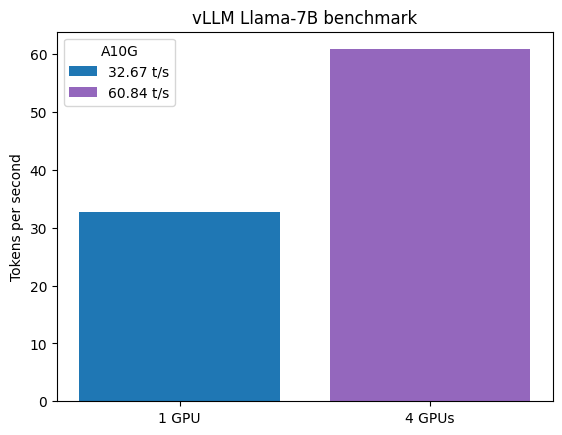

In [37]:
X = [df_1gpus.tokens_per_sec.mean(), df_4gpus.tokens_per_sec.mean()]

fig, ax = plt.subplots()
bar_colors = ['tab:blue', 'tab:purple']
labels = [f"{df_1gpus.tokens_per_sec.mean():.2f} t/s", f"{df_4gpus.tokens_per_sec.mean():.2f} t/s"]
ax.bar(["1 GPU", "4 GPUs"], X, color=bar_colors, label=labels)
ax.set_ylabel('Tokens per second')
ax.set_title('vLLM Llama-7B benchmark')
ax.legend(title='A10G')
plt.show()
